### **Load the dataset as dataframe using pandas**

In [204]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [205]:
wine = pd.read_csv('/content/wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [206]:
wine.shape

(1599, 12)

### **Handle missing values**

In [207]:
wine.isnull().sum()
#No missing values to handle

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **Encode categorical features**

In [208]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [209]:
wine["quality"].unique()

array(['bad', 'good'], dtype=object)

In [210]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

wine['quality'] = enc.fit_transform(wine['quality'])

print(wine[['quality']])

      quality
0           0
1           0
2           0
3           1
4           0
...       ...
1594        0
1595        1
1596        1
1597        0
1598        1

[1599 rows x 1 columns]


### **Scale all the values between 0-1 with proper scaling technique**

In [211]:
columns_needed =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
       
arr = wine[columns_needed].to_numpy()
print(arr)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [212]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(arr)

wine[columns_needed] = pd.DataFrame(scaler.transform(arr), columns=columns_needed)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,1
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,1
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0


### **Split the dataset into features and labels**

In [213]:
wine_corr = wine.corr()
wine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


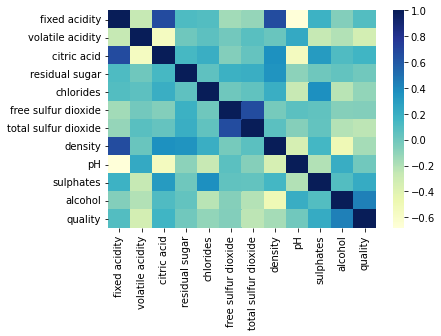

In [214]:
import seaborn as sns

sns.heatmap(wine_corr, cmap = 'YlGnBu')

In [215]:
# Drop the columns which contribute similar to another feature or is inversely proportional to the label
to_drop = ['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']

# Drop those columns from the DataFrame
wine = wine.drop(to_drop, axis=1)
wine

,citric acid,residual sugar,pH,sulphates,alcohol,quality
0,0.00,0.068493,0.606299,0.137725,0.153846,0
1,0.00,0.116438,0.362205,0.209581,0.215385,0
2,0.04,0.095890,0.409449,0.191617,0.215385,0
3,0.56,0.068493,0.330709,0.149701,0.215385,1
4,0.00,0.068493,0.606299,0.137725,0.153846,0
...,...,...,...,...,...,...
1594,0.08,0.075342,0.559055,0.149701,0.323077,0
1595,0.10,0.089041,0.614173,0.257485,0.430769,1
1596,0.13,0.095890,0.535433,0.251497,0.400000,1
1597,0.12,0.075342,0.653543,0.227545,0.276923,0


In [216]:
from sklearn.model_selection import train_test_split

features = ['citric acid', 'residual sugar', 'pH', 'sulphates', 'alcohol']
label = 'quality'

X_train, X_test, y_train, y_test = train_test_split(wine[features], wine[label], 
                                                    test_size = 0.25, random_state=0)

print(X_train.shape)
print(X_test.shape)

(1199, 5)
(400, 5)


In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test, y_test)))

Scaled test set accuracy: 0.75
